In [1]:
import pandas as pd 
import numpy as np


In [2]:
courses = pd.read_csv(r'D:\Learning Data Science\Dataset\courses.csv')
students = pd.read_csv(r'D:\Learning Data Science\Dataset\students.csv')
nov = pd.read_csv(r'D:\Learning Data Science\Dataset\reg-month1.csv')
dec = pd.read_csv(r'D:\Learning Data Science\Dataset\reg-month2.csv')
matches = pd.read_csv(r'D:\Learning Data Science\Dataset\matches.csv')
delivery = pd.read_csv(r'D:\Learning Data Science\Dataset\deliveries.csv')


In [3]:
courses
students
nov
dec
matches
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [4]:
#concat - pd.concat
pd.concat([nov,dec]).shape
pd.concat([nov,dec]).size
pd.concat([nov,dec])
regs = pd.concat([nov,dec],ignore_index=True) #concat and ignore the index
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [5]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])  #multiindex dataframe 
multi.loc['Nov']
multi.loc['Dec']
#i want to fetch nov 0th index data
multi.loc[('Nov',0)]
#i want to fetch nov 4th index data
multi.loc[('Nov',0)]
# concat dataframes horizontally
pd.concat([nov,dec],axis=1)
# pd.concat([nov,dec],axis=1).shape

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


In [6]:
#join in pandas (join in pandas is same as sql)
#1- Inner Join - Returns only the matching rows from both DataFrames.
students.merge(regs,how='inner', on ='student_id') #students and regs are dataframe 
#or 
students.merge(regs, how='inner', left_on='student_id', right_on='student_id')
#left table is students and right table is regs

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [7]:
#2. Left Join-A left join keeps all rows from the left DataFrame, and only the matching rows from the right DataFrame.
#If there’s no match, Pandas fills missing values with NaN.
courses.merge(regs,how='left',on = 'course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [8]:
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name': ["Nitish",'Ankit','Rahul'],
    'partner':[28,26,17]
})
pd.concat([students,temp_df],ignore_index=True)
students.tail()

,student_id,name,partner
20,21,Seema Kota,15
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2


In [9]:
#right join - A right join keeps all rows from the right DataFrame, and only matching rows from the left DataFrame.
# Missing values (where left table has no match) become NaN.
students.merge(regs,how='right',on = 'student_id')
#left join -A left join keeps all rows from the left DataFrame, and only the matching rows from the right DataFrame.
#If there’s no match, Pandas fills missing values with NaN.
students.merge(regs,how='left',on = 'student_id')
#we can reverse table order to perform join 
regs.merge(students,how='left',on = 'student_id')




,student_id,course_id,name,partner
0,23,1,Chhavi Lachman,18.0
1,15,5,Preet Sha,16.0
2,18,6,Fardeen Mahabir,13.0
3,23,4,Chhavi Lachman,18.0
4,16,9,Elias Dodiya,25.0
5,18,1,Fardeen Mahabir,13.0
6,1,1,Kailash Harjo,23.0
7,7,8,Tarun Thaker,9.0
8,22,3,Yash Sethi,21.0
9,15,1,Preet Sha,16.0


In [10]:
# OUTER JOIN (FULL OUTER JOIN)
# Returns all rows from both DataFrames.
# Missing matches are filled with NaN.
students.merge(regs,how='outer',on = 'student_id').tail(10)

,student_id,name,partner,course_id
50,23,Chhavi Lachman,18.0,3.0
51,23,Chhavi Lachman,18.0,6.0
52,23,Chhavi Lachman,18.0,9.0
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,38,NaN,NaN,1.0
58,42,NaN,NaN,9.0
59,50,NaN,NaN,8.0


In [11]:
#questions
# 1.find total revenue generated ?
total_revenue = regs.merge(courses,how = 'inner',on = 'course_id')['price'].sum()
print(total_revenue)

154247


In [12]:
# 2.find month by month revenue?
temp_df = pd.concat([nov,dec],keys = ['november','December']).reset_index()
temp_df.merge(courses,on = 'course_id').groupby('level_0')['price'].sum()

level_0
December    65072
november    89175
Name: price, dtype: int64

In [13]:
# 3. print the registration table 
# columns -> name,course,price
regs.merge(students,on = 'student_id').merge(courses,on = 'course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


<Axes: xlabel='course_name'>

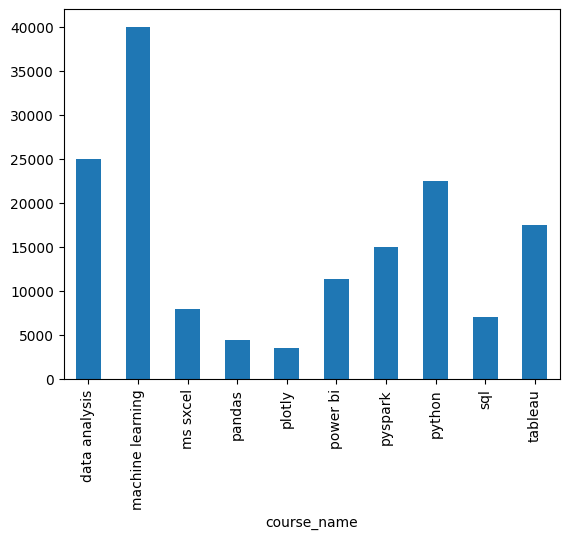

In [14]:
# 4. Plot bar chart for revenue/courses
regs.merge(courses,on = 'course_id').groupby('course_name')['price'].sum().plot(kind="bar")

In [15]:
# 5. find students who enrolled in both the months - using intersection - np.intersect1d
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [16]:
# 6. Find courses that got no enrollment(use setdifference - np.setdiff1d)
# courses['course_id']
# regs['course_id']
course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [17]:
# 7. Find students who did not enroll into any courses
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)]
#find number of students
students[students['student_id'].isin(student_id_list)].shape[0]

7

In [18]:
#Self join - A self join is when a table is joined with itself.
# You treat the same table as two different tables using aliases, so you can compare rows within the same table.
# Q8. print student name , partner name for all enrolled students
#self join 
students.merge(students,how = 'inner',left_on='partner',right_on = 'student_id')[['name_x','partner_x']]

,name_x,partner_x
0,Kailash Harjo,23
1,Esha Butala,1
2,Parveen Bhalla,3
3,Marlo Dugal,14
4,Kusum Bahri,6
5,Lakshmi Contractor,10
6,Tarun Thaker,9
7,Radheshyam Dey,5
8,Nitika Chatterjee,4
9,Aayushman Sant,8


In [19]:
# 9. find top students who did most number enrollments
regs.merge(students,on = 'student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False)

student_id  name              
23          Chhavi Lachman        6
7           Tarun Thaker          5
14          Pranab Natarajan      4
1           Kailash Harjo         4
16          Elias Dodiya          4
12          Radha Dutt            4
18          Fardeen Mahabir       3
11          David Mukhopadhyay    3
22          Yash Sethi            3
25          Shashank D’Alia       2
19          Qabeel Raman          2
15          Preet Sha             2
3           Parveen Bhalla        2
17          Yasmin Palan          2
2           Esha Butala           1
13          Munni Varghese        1
21          Seema Kota            1
24          Radhika Suri          1
Name: name, dtype: int64

In [20]:
# 10. find top students who spents most amount of money on courses
regs.merge(students,on ='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False)

student_id  name              
23          Chhavi Lachman        22594
14          Pranab Natarajan      15096
19          Qabeel Raman          13498
7           Tarun Thaker          10595
24          Radhika Suri           9999
16          Elias Dodiya           9796
22          Yash Sethi             9397
12          Radha Dutt             9096
1           Kailash Harjo          7596
3           Parveen Bhalla         7498
18          Fardeen Mahabir        5497
11          David Mukhopadhyay     5197
13          Munni Varghese         4999
15          Preet Sha              4998
25          Shashank D’Alia        4998
17          Yasmin Palan           4098
2           Esha Butala            2499
21          Seema Kota             2499
Name: price, dtype: int64

In [21]:
#Alternative or Another syntax for merge - pd.merge
pd.merge(students,regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [22]:
#ipl dataset
matches
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
# Q- find top Stadium with highest sixes/match ratio
temp_df = delivery.merge(matches,left_on='match_id',right_on='id')
six_df = temp_df[temp_df['batsman_runs'] == 6]
# stadium -> sixes
num_sixes = six_df.groupby('venue')['venue'].count()
#number of matches in the stadium 
num_matches = matches['venue'].value_counts()
#highest sixes/match ratio
(num_sixes / num_matches).sort_values(ascending=False)


venue
Holkar Cricket Stadium                                  17.600000
M Chinnaswamy Stadium                                   13.227273
Sharjah Cricket Stadium                                 12.666667
Himachal Pradesh Cricket Association Stadium            12.000000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11.727273
Wankhede Stadium                                        11.526316
De Beers Diamond Oval                                   11.333333
Maharashtra Cricket Association Stadium                 11.266667
JSCA International Stadium Complex                      10.857143
Sardar Patel Stadium, Motera                            10.833333
Feroz Shah Kotla                                        10.600000
MA Chidambaram Stadium, Chepauk                         10.562500
Saurashtra Cricket Association Stadium                  10.400000
Brabourne Stadium                                       10.363636
Dr DY Patil Sports Academy                              10.176471
Raji

In [30]:
#Q- find orange cap holder of all the seasons 
temp_df = delivery.merge(matches,left_on='match_id',right_on='id')
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep = 'first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
